In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_csv('train_data.csv')
df=data.copy()

In [4]:
df.columns

Index(['id', 'date', 'prix', 'nb_chambres', 'nb_sdb', 'm2_interieur',
       'm2_jardin', 'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer',
       'vue_note', 'etat_note', 'design_note', 'annee_construction',
       'annee_renovation', 'm2_interieur_15voisins', 'm2_jardin_15voisins',
       'zipcode', 'lat', 'long'],
      dtype='object')

C:\Users\qevan\AppData\Local\Temp\ipykernel_26176\3150652237.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prix_moyen_par_zipcode.index, y=prix_moyen_par_zipcode.values, palette="viridis")


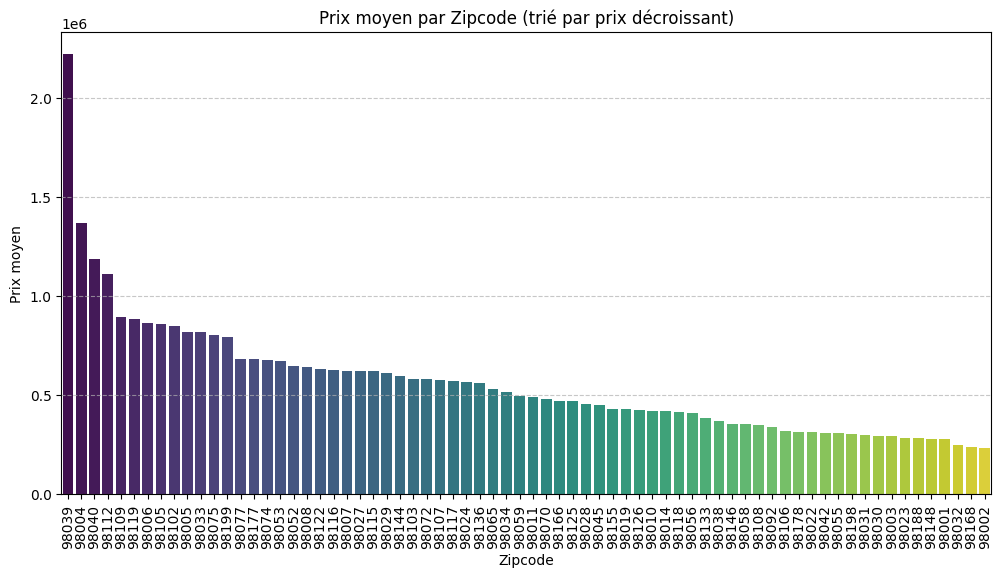

In [5]:
# Calcul du prix moyen par zipcode et tri décroissant
prix_moyen_par_zipcode = df.groupby('zipcode')['prix'].mean().sort_values(ascending=False)

# Convertir les zipcodes en catégorie ordonnée pour conserver le tri
zipcodes_sorted = prix_moyen_par_zipcode.index.astype(str)  # Convertir en string pour éviter les erreurs
prix_moyen_par_zipcode.index = pd.Categorical(zipcodes_sorted, categories=zipcodes_sorted, ordered=True)

# Tracer le barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=prix_moyen_par_zipcode.index, y=prix_moyen_par_zipcode.values, palette="viridis")

# Améliorer l'affichage
plt.xticks(rotation=90)
plt.xlabel("Zipcode")
plt.ylabel("Prix moyen")
plt.title("Prix moyen par Zipcode (trié par prix décroissant)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

nb_sdb
0.00    3.788000e+05
0.50    2.123333e+05
0.75    2.922176e+05
1.00    3.456968e+05
1.25    6.212167e+05
1.50    4.100052e+05
1.75    4.564921e+05
2.00    4.588481e+05
2.25    5.336995e+05
2.50    5.535861e+05
2.75    6.609409e+05
3.00    7.184683e+05
3.25    9.635920e+05
3.50    9.326488e+05
3.75    1.212423e+06
4.00    1.273642e+06
4.25    1.528993e+06
4.50    1.301722e+06
4.75    2.068809e+06
5.00    1.700068e+06
5.25    1.927300e+06
5.50    2.624778e+06
5.75    3.143333e+06
6.00    2.476200e+06
6.25    3.094000e+06
6.50    2.238890e+06
6.75    2.734000e+06
7.75    6.885000e+06
Name: prix, dtype: float64


C:\Users\qevan\AppData\Local\Temp\ipykernel_26176\650044789.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prix_moyen_par_nb_sdb.index, y=prix_moyen_par_nb_sdb.values, palette="viridis")


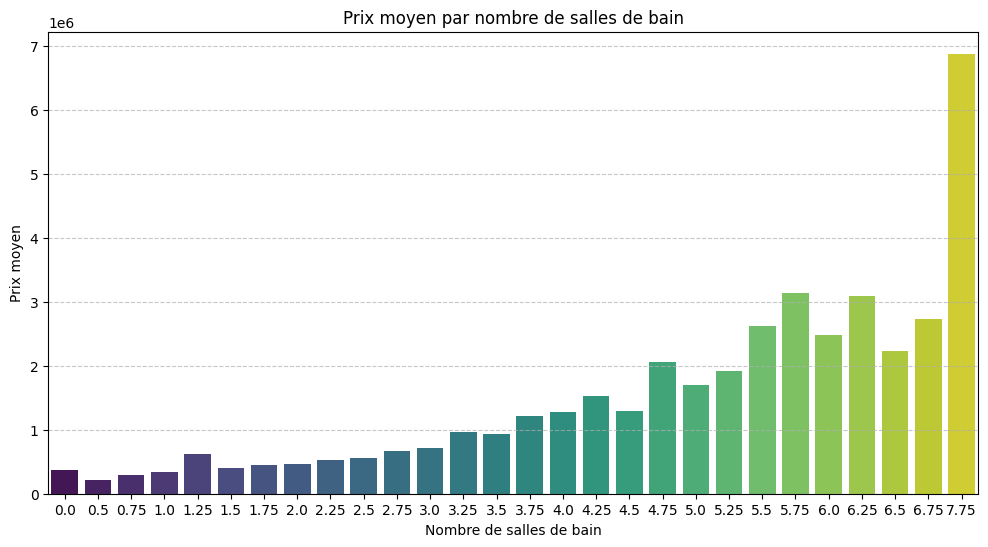

In [ ]:
# Calcul du prix moyen par nombre de salles de bain
prix_moyen_par_nb_sdb = df.groupby('nb_sdb')['prix'].mean()
# Tracer le barplot sans tri
plt.figure(figsize=(12, 6))
sns.barplot(x=prix_moyen_par_nb_sdb.index, y=prix_moyen_par_nb_sdb.values, palette="viridis")

# Améliorer l'affichage
plt.xticks(rotation=0)  # Pas besoin de rotation si peu de catégories
plt.xlabel("Nombre de salles de bain")
plt.ylabel("Prix moyen")
plt.title("Prix moyen par nombre de salles de bain")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

<Axes: xlabel='m2_interieur', ylabel='prix'>

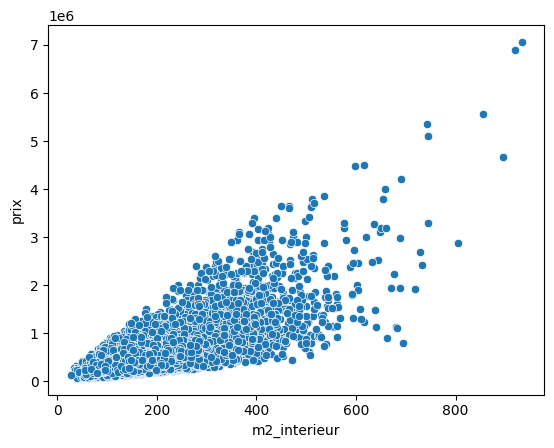

In [50]:
df.head()
sns.scatterplot(x=df['m2_interieur'],y=df['prix'])

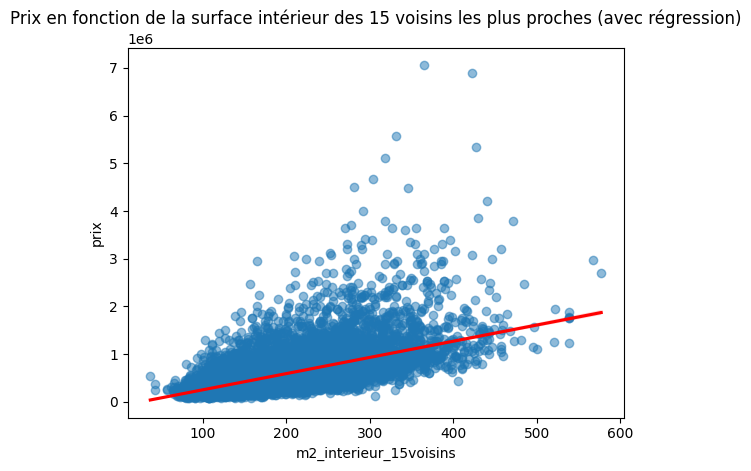

In [34]:
sns.regplot(x=df['m2_interieur_15voisins'], y=df['prix'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Prix en fonction de la surface intérieur des 15 voisins les plus proches (avec régression)")
plt.show()

<Axes: xlabel='long', ylabel='lat'>

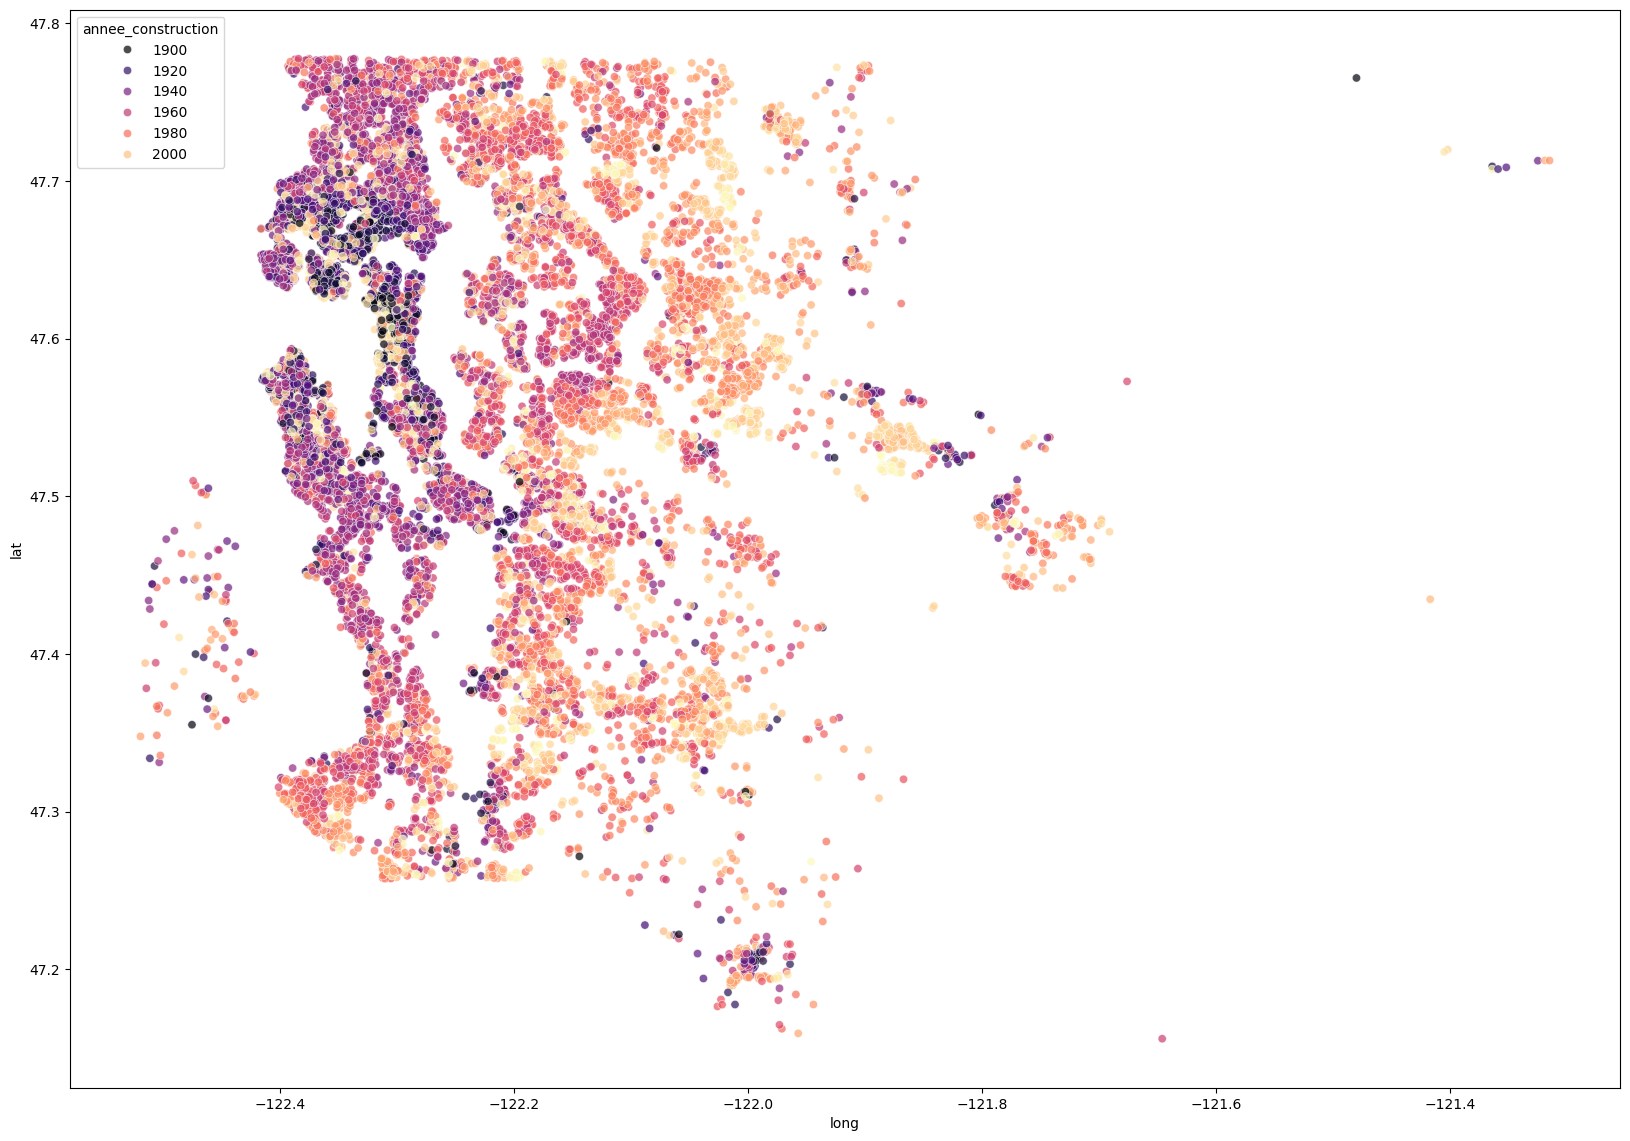

In [54]:
plt.figure(figsize=(20, 14))
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['annee_construction'], palette="magma", alpha=0.7)

In [48]:
print(df.groupby('design_note')['prix'].mean().sort_values(ascending=False))

design_note
13    3.377083e+06
12    2.197115e+06
11    1.506456e+06
10    1.085150e+06
9     7.720122e+05
8     5.429071e+05
7     4.023515e+05
6     3.012834e+05
5     2.490926e+05
4     2.121220e+05
3     2.056667e+05
1     1.420000e+05
Name: prix, dtype: float64


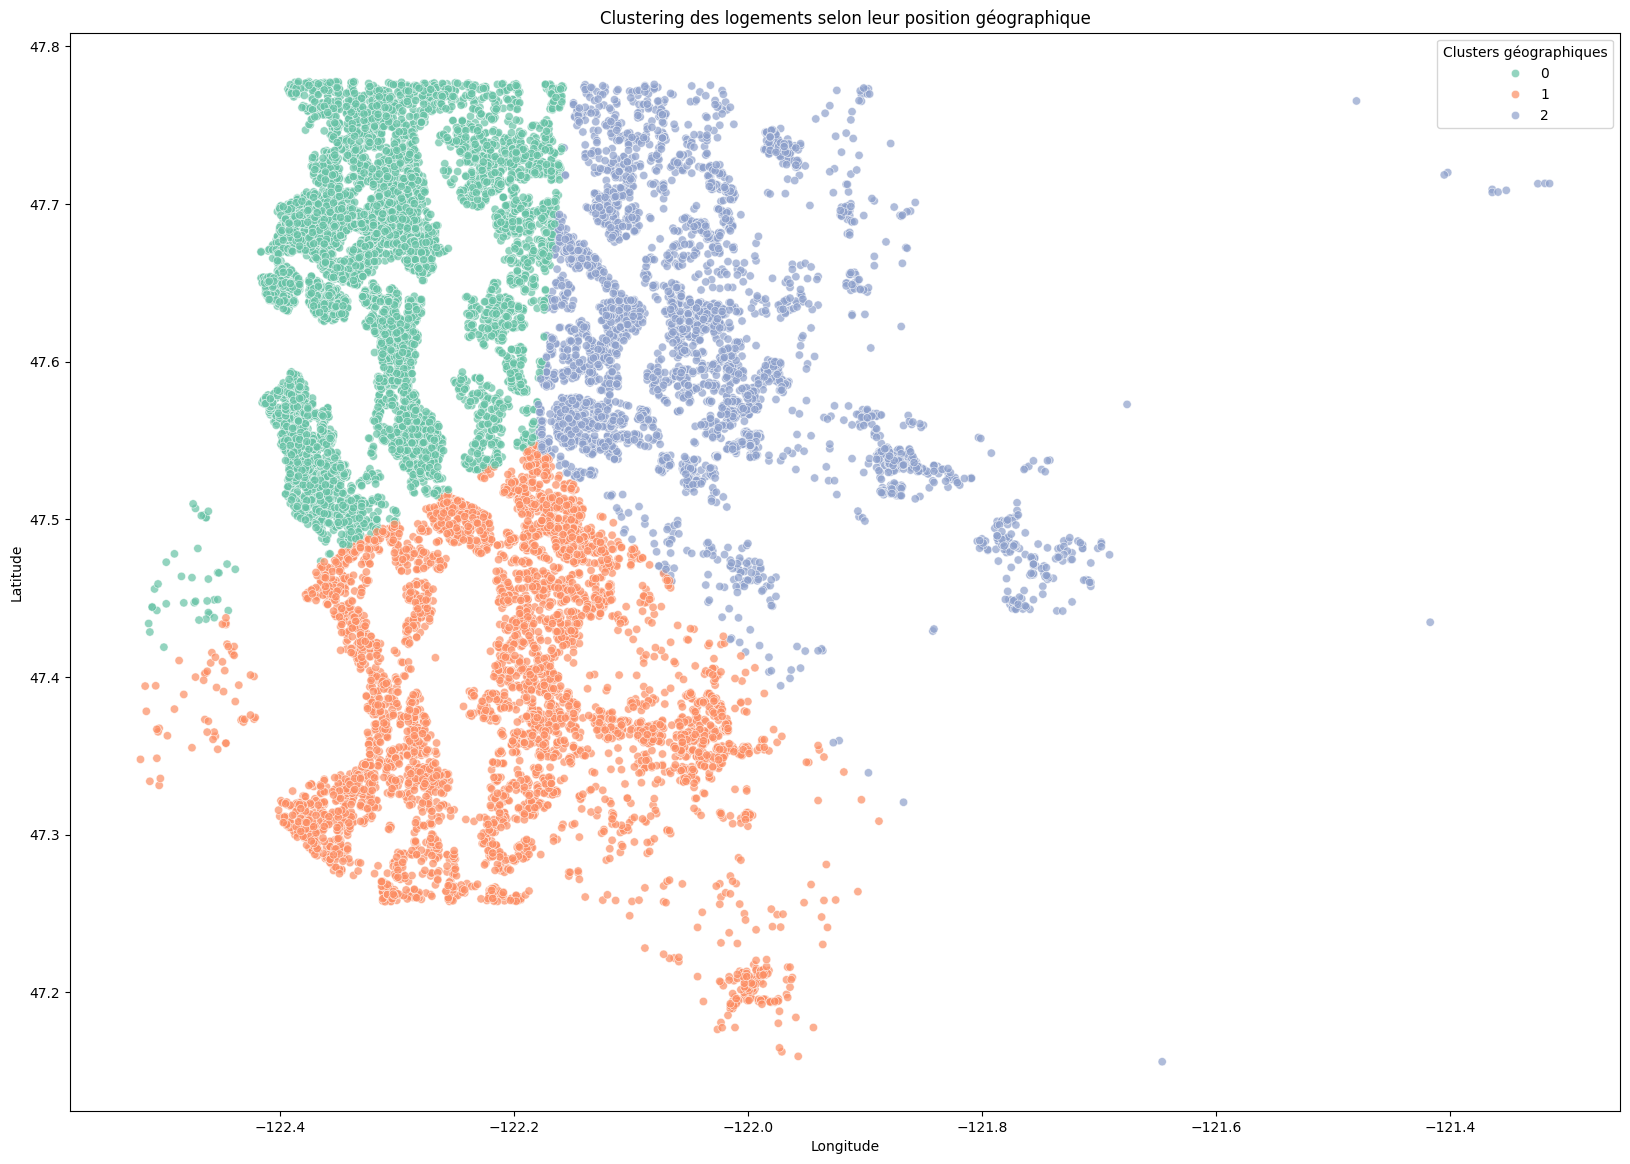

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 1️⃣ Vérifier et convertir 'zipcode' en string (au cas où)
df['zipcode'] = df['zipcode'].astype(str)

# 2️⃣ Appliquer K-Means directement sur les coordonnées des logements
n_clusters = 3  # Ajuste selon tes besoins
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df[['lat', 'long']])

# 3️⃣ Ajouter les labels des clusters directement au DataFrame
df['cluster'] = kmeans.labels_

# 4️⃣ Visualisation des clusters
plt.figure(figsize=(20, 14))
sns.scatterplot(
    x=df['long'], 
    y=df['lat'], 
    hue=df['cluster'],  
    palette="Set2",  
    alpha=0.7
)
plt.legend(title="Clusters géographiques")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustering des logements selon leur position géographique")
plt.show()



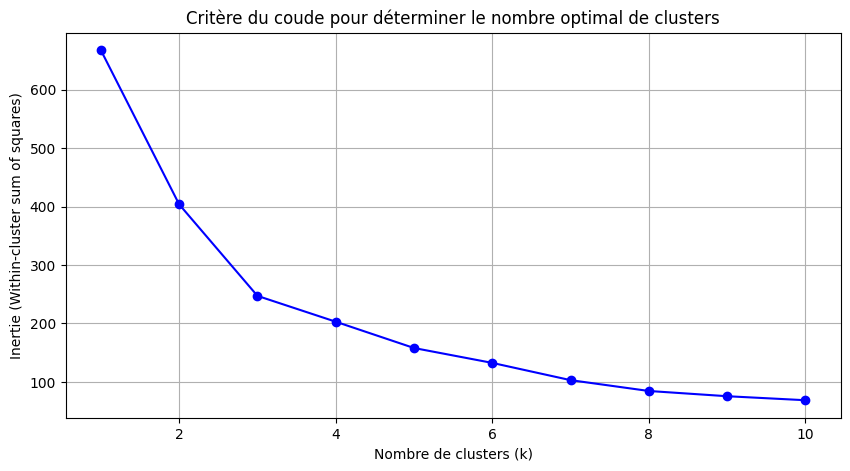

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 1️⃣ Vérifier et convertir 'zipcode' en string (au cas où)
df['zipcode'] = df['zipcode'].astype(str)

# 2️⃣ Déterminer le nombre optimal de clusters avec le critère du coude
inerties = []
K_range = range(1, 11)  # Tester de 1 à 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['lat', 'long']])
    inerties.append(kmeans.inertia_)  # Stocke l'inertie pour chaque k

# 3️⃣ Affichage du critère du coude
plt.figure(figsize=(10, 5))
plt.plot(K_range, inerties, marker='o', linestyle='-', color='b')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (Within-cluster sum of squares)")
plt.title("Critère du coude pour déterminer le nombre optimal de clusters")
plt.grid()
plt.show()
